## **Importing Libraries**

In [49]:
#Importing all the important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as ncolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import operator

plt.style.use('seaborn')

%matplotlib inline

## **Loading DataSets**

In [59]:
#Loading all the 3 dataset
confirmed = pd.read_csv("/content/confirmed.csv")
recovered = pd.read_csv("/content/recovered.csv")
deaths = pd.read_csv("/content/death.csv")

,Country,State,s,s.1,4/01/2020,4/02/2020,4/03/2020,4/04/2020,4/05/2020,4/06/2020,4/07/2020,4/08/2020,4/09/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/01/2020,5/02/2020,5/03/2020,5/04/2020,5/05/2020,5/06/2020,...,6/09/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/01/2020,7/02/2020,7/03/2020,7/04/2020,7/05/2020,7/06/2020,7/07/2020,7/08/2020,7/09/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020
0,India,Andaman and Nicobar Islands,na,na,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,12,14,15,16,17,18,22,27,33,33,33,33,33,33,33,33,33,33,33,...,33,33,34,38,38,38,38,41,44,44,44,45,47,48,48,50,56,59,72,72,76,90,97,100,109,116,119,125,141,147,149,151,156,163,163,166,166,176,180,194.0
1,India,Andhra Pradesh,na,na,83,86,132,161,190,226,266,305,348,363,381,381,432,473,503,534,572,603,603,722,757,813,895,955,1061,1097,1177,1259,1332,1403,1463,1525,1583,1650,1717,1717,...,4851,5070,5269,5429,5680,5965,6163,6456,6841,7071,7518,7961,8452,8999,9372,10002,10331,10884,11489,12285,13241,13891,14595,15252,16097,16934,17699,18697,20019,21197,22259,23814,25422,27235,29168,31103,33019,35451,38044,40646.0
2,India,Arunachal Pradesh,na,na,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,51,57,57,61,67,87,91,91,95,99,103,103,135,135,139,148,158,160,172,177,182,187,191,195,195,252,259,269,270,276,287,302,335,341,359,387,462,462,543,609.0
3,India,Assam,na,na,0,5,16,24,26,26,26,27,28,29,29,29,32,32,33,33,35,35,35,35,35,35,35,36,36,36,36,38,38,42,42,43,43,43,43,43,...,2776,2937,3092,3319,3498,3718,4049,4158,4319,4605,4777,4904,4904,5388,5586,5831,6198,6321,6607,6816,7206,7752,8227,8582,9013,9673,10668,11388,12160,12522,13336,14032,14600,15536,16071,16806,17807,18666,19754,20646.0
4,India,Bihar,na,na,23,24,24,29,30,32,32,38,39,60,60,64,64,66,70,74,83,85,86,96,115,126,148,176,228,251,277,346,383,403,426,471,482,517,529,536,...,5202,5459,5710,5983,6103,6290,6470,6650,6778,6942,7025,7181,7533,7612,7825,8153,8209,8473,8716,8931,9212,9640,10043,10249,10471,10954,11700,11876,12125,12570,13189,13944,14575,15373,16642,17959,19284,20612,21764,23589.0


In [146]:
print('Confirmed Cases')
confirmed.head()

Confirmed Cases


,Country,State,s,s.1,4/01/2020,4/02/2020,4/03/2020,4/04/2020,4/05/2020,4/06/2020,4/07/2020,4/08/2020,4/09/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/01/2020,5/02/2020,5/03/2020,5/04/2020,5/05/2020,5/06/2020,...,6/09/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/01/2020,7/02/2020,7/03/2020,7/04/2020,7/05/2020,7/06/2020,7/07/2020,7/08/2020,7/09/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020
0,India,Andaman and Nicobar Islands,na,na,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,12,14,15,16,17,18,22,27,33,33,33,33,33,33,33,33,33,33,33,...,33,33,34,38,38,38,38,41,44,44,44,45,47,48,48,50,56,59,72,72,76,90,97,100,109,116,119,125,141,147,149,151,156,163,163,166,166,176,180,194.0
1,India,Andhra Pradesh,na,na,83,86,132,161,190,226,266,305,348,363,381,381,432,473,503,534,572,603,603,722,757,813,895,955,1061,1097,1177,1259,1332,1403,1463,1525,1583,1650,1717,1717,...,4851,5070,5269,5429,5680,5965,6163,6456,6841,7071,7518,7961,8452,8999,9372,10002,10331,10884,11489,12285,13241,13891,14595,15252,16097,16934,17699,18697,20019,21197,22259,23814,25422,27235,29168,31103,33019,35451,38044,40646.0
2,India,Arunachal Pradesh,na,na,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,51,57,57,61,67,87,91,91,95,99,103,103,135,135,139,148,158,160,172,177,182,187,191,195,195,252,259,269,270,276,287,302,335,341,359,387,462,462,543,609.0
3,India,Assam,na,na,0,5,16,24,26,26,26,27,28,29,29,29,32,32,33,33,35,35,35,35,35,35,35,36,36,36,36,38,38,42,42,43,43,43,43,43,...,2776,2937,3092,3319,3498,3718,4049,4158,4319,4605,4777,4904,4904,5388,5586,5831,6198,6321,6607,6816,7206,7752,8227,8582,9013,9673,10668,11388,12160,12522,13336,14032,14600,15536,16071,16806,17807,18666,19754,20646.0
4,India,Bihar,na,na,23,24,24,29,30,32,32,38,39,60,60,64,64,66,70,74,83,85,86,96,115,126,148,176,228,251,277,346,383,403,426,471,482,517,529,536,...,5202,5459,5710,5983,6103,6290,6470,6650,6778,6942,7025,7181,7533,7612,7825,8153,8209,8473,8716,8931,9212,9640,10043,10249,10471,10954,11700,11876,12125,12570,13189,13944,14575,15373,16642,17959,19284,20612,21764,23589.0


In [61]:
print('Recovered Cases')
recovered.head()

Recovered Cases


,Country,State,s,s.1,4/01/2020,4/02/2020,4/03/2020,4/04/2020,4/05/2020,4/06/2020,4/07/2020,4/08/2020,4/09/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/01/2020,5/02/2020,5/03/2020,5/04/2020,5/05/2020,5/06/2020,...,6/09/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/01/2020,7/02/2020,7/03/2020,7/04/2020,7/05/2020,7/06/2020,7/07/2020,7/08/2020,7/09/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020
0,India,Andaman and Nicobar Islands,na,na,0,0,0,0,0,0,0,0,0,0,0,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,15,15,16,16,17,32,32,32,...,33,33,33,33,33,33,33,33,33,33,33,35,36,37,37,40,43,43,43,43,45,46,50,50,51,54,66,72,74,75,77,83,92,93,93,109,109,130,133,142.0
1,India,Andhra Pradesh,na,na,1,1,1,1,1,1,1,5,6,7,11,11,11,14,16,20,36,42,42,92,96,120,141,145,171,231,235,258,287,321,403,441,488,524,589,589,...,2745,2802,2899,3048,3105,3195,3314,3316,3509,3641,3789,3917,4111,4331,4495,4599,4779,4988,5196,5480,5908,6232,6511,6988,7313,7632,8008,8422,8920,9745,11101,12154,13194,14393,15412,16464,17467,18378,19393,20298.0
2,India,Arunachal Pradesh,na,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,2,4,4,4,7,7,7,7,10,11,14,15,21,22,38,38,42,54,60,61,62,66,66,75,76,78,92,105,109,120,120,125,138,145,153,153,153,175.0
3,India,Assam,na,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,9,12,17,19,19,19,19,19,19,27,27,27,29,29,32,32,32,32,32,...,665,1085,1249,1432,1537,1584,1960,2166,2166,2642,2654,3039,3039,3360,3521,3762,3958,4033,4259,4500,5088,5333,5647,5851,6106,6349,6657,7125,7882,8329,8729,8729,9147,9150,10426,10894,11416,12173,12888,14105.0
4,India,Bihar,na,na,0,0,0,0,0,0,0,0,0,0,0,19,26,26,29,29,37,37,37,42,42,46,46,46,46,46,56,57,64,65,82,98,117,125,130,142,...,2499,2864,3071,3266,3587,3956,4170,4409,4644,4926,5056,5098,5529,5580,5781,6104,6113,6441,6762,6843,7118,7390,7687,7946,8020,8214,8686,8765,8997,9284,9554,9816,10109,10685,11498,12317,12849,13462,14018,14621.0


In [62]:
print('Deaths Reported')
deaths.head()

Deaths Reported


,Country,State,s,s.1,4/01/2020,4/02/2020,4/03/2020,4/04/2020,4/05/2020,4/06/2020,4/07/2020,4/08/2020,4/09/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/01/2020,5/02/2020,5/03/2020,5/04/2020,5/05/2020,5/06/2020,...,6/09/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/01/2020,7/02/2020,7/03/2020,7/04/2020,7/05/2020,7/06/2020,7/07/2020,7/08/2020,7/09/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020
0,India,Andaman and Nicobar Islands,na,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,India,Andhra Pradesh,na,na,0,1,1,1,1,3,3,4,4,6,6,6,7,9,9,14,14,15,15,20,22,24,27,29,31,31,31,31,31,31.0,33,33,33,36,36,36,...,75,77,78,80,80,82,84,88,88,90,92,96,101,106,111,119,124,136,148,157,169,180,187,193,198,206,218,232,239,252,264,277,292,309,328.0,365.0,408.0,452.0,492.0,534.0
2,India,Arunachal Pradesh,na,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2.0,2.0,3.0,3.0,3.0,3.0
3,India,Assam,na,na,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,...,4,4,4,6,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,10,11,12,12,12,14,14,14,14,14,16,22,27,35,35.0,36.0,40.0,46.0,48.0,51.0
4,India,Bihar,na,na,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,3,4,4,4,4,...,31,32,33,36,36,39,39,40,41,44,44,50,52,53,55,56,57,57,58,59,60,62,67,70,77,80,89,95,97,104,107,115,119,131,143.0,160.0,174.0,180.0,197.0,201.0


## **Preprocessing Data**

In [63]:
cols=confirmed.keys()
confirmed1 = confirmed.loc[:, cols[4]:cols[-1]]
recovered1 = recovered.loc[:, cols[4]:cols[-1]]
deaths1 = deaths.loc[:, cols[4]:cols[-1]]
confirmed1.head()

,4/01/2020,4/02/2020,4/03/2020,4/04/2020,4/05/2020,4/06/2020,4/07/2020,4/08/2020,4/09/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/01/2020,5/02/2020,5/03/2020,5/04/2020,5/05/2020,5/06/2020,5/07/2020,5/08/2020,5/09/2020,5/10/2020,...,6/09/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/01/2020,7/02/2020,7/03/2020,7/04/2020,7/05/2020,7/06/2020,7/07/2020,7/08/2020,7/09/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020
0,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,12,14,15,16,17,18,22,27,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,...,33,33,34,38,38,38,38,41,44,44,44,45,47,48,48,50,56,59,72,72,76,90,97,100,109,116,119,125,141,147,149,151,156,163,163,166,166,176,180,194.0
1,83,86,132,161,190,226,266,305,348,363,381,381,432,473,503,534,572,603,603,722,757,813,895,955,1061,1097,1177,1259,1332,1403,1463,1525,1583,1650,1717,1717,1777,1847,1887,1930,...,4851,5070,5269,5429,5680,5965,6163,6456,6841,7071,7518,7961,8452,8999,9372,10002,10331,10884,11489,12285,13241,13891,14595,15252,16097,16934,17699,18697,20019,21197,22259,23814,25422,27235,29168,31103,33019,35451,38044,40646.0
2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,51,57,57,61,67,87,91,91,95,99,103,103,135,135,139,148,158,160,172,177,182,187,191,195,195,252,259,269,270,276,287,302,335,341,359,387,462,462,543,609.0
3,0,5,16,24,26,26,26,27,28,29,29,29,32,32,33,33,35,35,35,35,35,35,35,36,36,36,36,38,38,42,42,43,43,43,43,43,45,54,59,63,...,2776,2937,3092,3319,3498,3718,4049,4158,4319,4605,4777,4904,4904,5388,5586,5831,6198,6321,6607,6816,7206,7752,8227,8582,9013,9673,10668,11388,12160,12522,13336,14032,14600,15536,16071,16806,17807,18666,19754,20646.0
4,23,24,24,29,30,32,32,38,39,60,60,64,64,66,70,74,83,85,86,96,115,126,148,176,228,251,277,346,383,403,426,471,482,517,529,536,542,550,571,591,...,5202,5459,5710,5983,6103,6290,6470,6650,6778,6942,7025,7181,7533,7612,7825,8153,8209,8473,8716,8931,9212,9640,10043,10249,10471,10954,11700,11876,12125,12570,13189,13944,14575,15373,16642,17959,19284,20612,21764,23589.0


## **Further Modification**

In [66]:
dates = confirmed1.keys()
total_deaths = []
total_cases = []
active_cases = []
mortality_rate = []
total_recovered = []
for i in dates:
    confirmed_sum = confirmed1[i].sum()
    recovered_sum = recovered1[i].sum()
    death_sum = deaths1[i].sum()

    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    active_cases.append(confirmed_sum - recovered_sum - death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [90]:
total_cases

[1638,
 2070,
 2283,
 2903,
 3578,
 4281,
 4789,
 5283,
 5865,
 6765,
 7529,
 8449,
 9357,
 10818,
 11934,
 12760,
 13839,
 14794,
 16123,
 17659,
 18985,
 20475,
 21706,
 23456,
 24901,
 26620,
 28181,
 29836,
 31711,
 33334,
 34972,
 37675,
 40124,
 42836,
 46721,
 49393,
 52957,
 56342,
 59686,
 62940,
 67156,
 70780,
 74282,
 78027,
 81976,
 85724,
 90643,
 95759,
 100333,
 105654,
 111015,
 116845,
 123244,
 129758,
 136359,
 142652,
 147959,
 154366,
 161445,
 169089,
 177070,
 185225,
 192741,
 200872,
 209845,
 219675,
 229019,
 238571,
 249357,
 258322,
 267777,
 278198,
 289714,
 301557,
 313909,
 325877,
 335898,
 346239,
 358703,
 372005,
 386224,
 401856,
 417927,
 432618,
 448509,
 465142,
 482848,
 501500,
 521617,
 541719,
 560552,
 579220,
 598521,
 620293,
 644103,
 669473,
 693427,
 715630,
 738485,
 764149,
 791012,
 819038,
 848232,
 877473,
 906156,
 936475,
 969585,
 1005492,
 995621.0]

In [86]:
print('COVID19 in India')
print('------------------------')
print('Confirmed Cases:', math.trunc(confirmed_sum))
print('Recovered Cases:', math.trunc(recovered_sum))
print('Deaths:', math.trunc(death_sum))
print('Active Cases:', math.trunc(confirmed_sum - recovered_sum - death_sum))
print('Mortality Rate:', "{:.2%}".format(death_sum/confirmed_sum))
print('Recovery Rate:', "{:.2%}".format(recovered_sum/confirmed_sum))

COVID19 in India
------------------------
Confirmed Cases: 995621
Recovered Cases: 631498
Deaths: 25221
Active Cases: 338902
Mortality Rate: 2.53%
Recovery Rate: 63.43%


In [125]:
latest_data = pd.read_csv('/content/confirmed_total.csv')
latest_data.head()

,State,Confirmed,Deaths,Recovered
0,Andaman and Nicobar Islands,194,0,142
1,Andhra Pradesh,40646,534,20298
2,Arunachal Pradesh,609,3,175
3,Assam,20646,51,14105
4,Bihar,23589,201,14621


In [126]:
unique_states = list(latest_data['State'].unique())
unique_states

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerela',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'Dadra and Nagar Haveli and Daman and Diu']

In [138]:
state_confirmed_cases = []
state_death_cases = []
state_active_cases = []
state_recovery_cases = []
state_mortality_rate = []

no_cases = []
for i in unique_states:
  cases = latest_data[latest_data['State']==i]['Confirmed'].sum()
  if cases > 0:
    state_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_states.remove(i)

In [139]:
# Sort states by the number of confirmed cases
unique_states = [k for k, v in sorted(zip(unique_states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_states)):
  state_confirmed_cases[i] = latest_data[latest_data['State']==unique_states[i]]['Confirmed'].sum()
  state_death_cases.append(latest_data[latest_data['State']==unique_states[i]]['Deaths'].sum())
  state_recovery_cases.append(latest_data[latest_data['State']==unique_states[i]]['Recovered'].sum())
  state_active_cases.append(state_confirmed_cases[i] - state_death_cases[i] - state_recovery_cases[i])
  state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])

In [140]:
state_df = pd.DataFrame({'State': unique_states, 'Number of Confirmed Cases': state_confirmed_cases,
                          'Number of Deaths': state_death_cases, 'Number of Recoveries': state_recovery_cases,
                          'Number of Active Cases': state_active_cases,
                          'Mortality Rate': state_mortality_rate
                           })
state_df.style.background_gradient(cmap='Blues')

,State,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,Maharashtra,292589,11452,160357,120780,0.039140
1,Tamil Nadu,160907,2315,110807,47785,0.014387
2,Delhi,120107,3571,99301,17235,0.029732
3,Karnataka,55115,1147,20757,33211,0.020811
4,Gujarat,46430,2106,32973,11351,0.045359
5,Uttar Pradesh,45163,1084,27634,16445,0.024002
6,Telangana,42496,403,28705,13388,0.009483
7,Andhra Pradesh,40646,534,20298,19814,0.013138
8,West Bengal,38011,1049,22253,14709,0.027597
9,Rajasthan,27789,546,20626,6617,0.019648


## **Converting Dates to Numbers**

In [141]:
#Convert all number in date format
day_since = np.array([i for i in range(len(dates))]).reshape(-1,1)
total_cases = np.array(total_cases).reshape(-1,1)
#total_deaths = np.array(total_deaths).reshape(-1,1)
#total_recovered = np.array(total_recovered).reshape(-1,1)

print('\nTotal Cases',total_cases)
total_cases.shape
#print('\nTotal Deaths',total_deaths)
#print('\nTotal Recovered',total_recovered)


Total Cases [[   1638.]
 [   2070.]
 [   2283.]
 [   2903.]
 [   3578.]
 [   4281.]
 [   4789.]
 [   5283.]
 [   5865.]
 [   6765.]
 [   7529.]
 [   8449.]
 [   9357.]
 [  10818.]
 [  11934.]
 [  12760.]
 [  13839.]
 [  14794.]
 [  16123.]
 [  17659.]
 [  18985.]
 [  20475.]
 [  21706.]
 [  23456.]
 [  24901.]
 [  26620.]
 [  28181.]
 [  29836.]
 [  31711.]
 [  33334.]
 [  34972.]
 [  37675.]
 [  40124.]
 [  42836.]
 [  46721.]
 [  49393.]
 [  52957.]
 [  56342.]
 [  59686.]
 [  62940.]
 [  67156.]
 [  70780.]
 [  74282.]
 [  78027.]
 [  81976.]
 [  85724.]
 [  90643.]
 [  95759.]
 [ 100333.]
 [ 105654.]
 [ 111015.]
 [ 116845.]
 [ 123244.]
 [ 129758.]
 [ 136359.]
 [ 142652.]
 [ 147959.]
 [ 154366.]
 [ 161445.]
 [ 169089.]
 [ 177070.]
 [ 185225.]
 [ 192741.]
 [ 200872.]
 [ 209845.]
 [ 219675.]
 [ 229019.]
 [ 238571.]
 [ 249357.]
 [ 258322.]
 [ 267777.]
 [ 278198.]
 [ 289714.]
 [ 301557.]
 [ 313909.]
 [ 325877.]
 [ 335898.]
 [ 346239.]
 [ 358703.]
 [ 372005.]
 [ 386224.]
 [ 401856.]
 [ 

(109, 1)

## **Future Days Handling**

In [148]:
print('\nEnter the number of days to predict:')
days_in_future = int(input())
future_forecast  = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast
adjusted_dates.shape
adjusted_dates

start = '01/04/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

print('Predicting Cases for Dates')
future_forecast_dates[-20:]


Enter the number of days to predict:
20
Predicting Cases for Dates


['19/07/2020',
 '20/07/2020',
 '21/07/2020',
 '22/07/2020',
 '23/07/2020',
 '24/07/2020',
 '25/07/2020',
 '26/07/2020',
 '27/07/2020',
 '28/07/2020',
 '29/07/2020',
 '30/07/2020',
 '31/07/2020',
 '01/08/2020',
 '02/08/2020',
 '03/08/2020',
 '04/08/2020',
 '05/08/2020',
 '06/08/2020',
 '07/08/2020']

## Train-Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(day_since,total_cases, test_size=0.15, shuffle=False)

X_train.shape

(92, 1)

# **SVM**

In [145]:
#SVM
kernel = ['poly', 'sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=20, verbose=1)
svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 19.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)


## **Predictor Model**

In [54]:
svm_predictor_model = svm_search.best_estimator_
pred=svm_predictor_model.predict(X_test)
print('Mean Absolute Error MAE:', mean_absolute_error(y_test, pred))
print('\nMean Squared Error MSE:', mean_squared_error(y_test, pred))
print('\nRoot Mean Squared Error RMSE:', math.sqrt(mean_squared_error(y_test, pred)))
print('\nr2 score:', r2_score(y_test, pred))

Mean Absoulute Error MAE: 41210.349733518495

Mean Squared Error MSE: 2187760391.88456

Root Mean Squared Error RMSE: 46773.50095817674

r2 score: 0.869818130401562


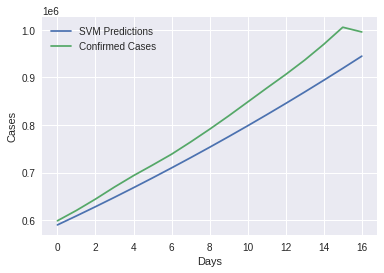

In [55]:
plt.plot(pred)
plt.plot(y_test)
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend(['SVM Predictions','Confirmed Cases'])

## Predicting Future Cases

In [150]:
future_pred=svm_predictor_model.predict(future_forecast)
round_off=np.round_(future_pred) 
data={
    'Date':future_forecast_dates[-days_in_future:],
    'Prediction':round_off[-days_in_future:]
}
#svm_df=pd.DataFrame(('Date':future_forecast_dates[-30:],'Predictions':np.round(future_pred))
svm_df=pd.DataFrame(data,columns=['Date','Prediction'])
svm_df

,Date,Prediction
0,19/07/2020,970729.0
1,20/07/2020,997267.0
2,21/07/2020,1024291.0
3,22/07/2020,1051806.0
4,23/07/2020,1079817.0
5,24/07/2020,1108328.0
6,25/07/2020,1137344.0
7,26/07/2020,1166869.0
8,27/07/2020,1196908.0
9,28/07/2020,1227464.0
